In [1]:
import pandas as pd
import math
import random as rd
import matplotlib.pyplot as plt
import numpy as np


In [3]:



clientes = int(input());
tempo_medio_entre_chegadas = float(input());
tempo_atendimeno =  float(input());

l = 1 / tempo_medio_entre_chegadas;
u = 1 / tempo_atendimeno;
p = l/u;

tabel = pd.DataFrame({'Dados':[clientes , tempo_medio_entre_chegadas , tempo_atendimeno , l , u , p]})

tabel.index = ['Nº de Clientes' , 'Tempo médio entre chegadas /minuto', 'Tempo de atendimento / min' , 'Taxa de chegada  (λ)' , 'Nível de Serviço (μ)' , 'ρ']




print(tabel)


                                     Dados
Nº de Clientes                      1000.0
Tempo médio entre chegadas /minuto     1.0
Tempo de atendimento / min             0.5
Taxa de chegada  (λ)                   1.0
Nível de Serviço (μ)                   2.0
ρ                                      0.5


In [4]:
def generate_simulation(dados):
    
    ## ri = intervalo de tempo entre chegadas
    ## si = tempo de atendimento(duração)
    ## ai = instante da chegada 
    ## bi = inicio do atendimento
    ## ei = fim de atendimento 
    ## wi = tempo de espera na fila
    ## ui = tempo total no sistema
    ## oi = ociosidade do servidor simulado
    ## wq = tempo médio de fila simulado
    ri =0
    si =0
    ai =0
    bi =0 
    ei =0 
    wi =0 
    ui =0 
    oi =0
    wq =0
    m= 0
    dados.loc[0] = [0,0,0,0,0,0,0,0,0,0]

    for i in range(1,clientes):
    
    
    
       if(i > 0):
       
        ln_ri = (math.log (1-(rd.uniform(0,l)/l))) * (-1)
        
        ln_si = (math.log (1-(rd.uniform(0,u)/u))) * (-1)
        
        ri = ln_ri/l
        
        si = ln_si/u
     
       else:
        
         ri =0
         si =0
    
       ai = ri + ai
       
       bi = max(ai,ei)
       
       oi = bi - ei
       
       ei = bi + si
       
       wi = bi-ai
       
       ui = ei - bi
       
       wq +=wi
  
       if(i>0):
      
         m = wq / i
                
       dados.loc[i] = [i,ri,si,ai,bi,ei,wi,ui,oi,m]
    
    
    

In [5]:
def generate_frequency_plots(dados, wq_teorico):
    
    
   
    
    
    dados_aux_ri = pd.DataFrame(dados["Intervalo de tempo entre chegadas"])
    dados_aux_si = pd.DataFrame(dados["Tempo de atendimento(duração)"])
    dados_aux_wi = pd.DataFrame(dados["Tempo de espera na fila"])
    dados_aux_ui = pd.DataFrame(dados["Tempo Total no Sistema"])
    dados_aux_oi = pd.DataFrame(dados["Ociosidade Servidor Simulado"])
    dados_aux_wq = pd.DataFrame(dados["Tempo médio da fila simulado"])
    
    
    
    
    intervalos = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11.0, 11.5, 12, 12.5, 13]

    label_chegada = ['0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.5', '5.5-6.0', '6.0-6.5', '6.5-7.0', '7.0-7.5', '7.5-8.0', '8.0-8.5', '8.5-9.0', '9.0-9.5', '9.5-10.0', '10.0-10.5', '10.5-11.0', '11.0-11.5', '11.5-12.0', '12.0-12.5', '12.5-13.0']

    
    dados_aux_ri['Intervalos'] = pd.cut(dados_aux_ri["Intervalo de tempo entre chegadas"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_si['Intervalos'] = pd.cut(dados_aux_si["Tempo de atendimento(duração)"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_wi['Intervalos'] = pd.cut(dados_aux_wi["Tempo de espera na fila"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_ui['Intervalos'] = pd.cut(dados_aux_ui["Tempo Total no Sistema"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_oi['Intervalos'] = pd.cut(dados_aux_oi["Ociosidade Servidor Simulado"],bins=intervalos,labels=label_chegada, right=False)
    dados_aux_wq['Intervalos'] = pd.cut(dados_aux_wq["Tempo médio da fila simulado"],bins=intervalos,labels=label_chegada, right=False)
    
    freq_ri = dados_aux_ri['Intervalos'].value_counts().sort_index()
    freq_si = dados_aux_si['Intervalos'].value_counts().sort_index()
    freq_wi = dados_aux_wi['Intervalos'].value_counts().sort_index()
    freq_ui = dados_aux_ui['Intervalos'].value_counts().sort_index()
    freq_oi = dados_aux_oi['Intervalos'].value_counts().sort_index()
    freq_wq = dados_aux_wq['Intervalos'].value_counts().sort_index()
    
    
    plt.figure(figsize=(10, 10))
    freq_ri.plot(kind='bar', title='Tempo entra chegadas',color = 'blue')
    plt.xlabel('Intervalos de tempo de entra chegadas')
    plt.ylabel('Frequência')
    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_si.plot(kind='bar', title='Tempo de atendimento',color = 'green')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show() 

    plt.figure(figsize=(10, 10))
    freq_wi.plot(kind='bar', title='Tempo de espera na fila',color = 'red')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_ui.plot(kind='bar', title='Tempo total do sistema', color = 'purple')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

    plt.figure(figsize=(10, 10))
    freq_oi.plot(kind='bar', title='Ociosidade Servidor Simulado', color = 'orange')
    plt.xlabel('Intervalos de tempo')
    plt.ylabel('Frequência')

    plt.show()  

     
    
    plt.figure(figsize=(10, 10))
    
    x = np.arange(1,len(dados_aux_wq['Tempo médio da fila simulado'])+1)
    
    wq_simulado =  dados['Tempo médio da fila simulado']
    
    wq_teorico = np.full(len(wq_simulado), wq_teorico)
    
    
    plt.plot(x, wq_simulado, label='Tempo médio da fila' , color = 'blue', linewidth=2)
    plt.plot(x,wq_teorico, label = 'Tempo médio da fila Teórico', color='red', linestyle='--',linewidth=2)
    plt.title("Tempo médio da fila simulado x Tempo médio da fila teórico", fontsize = 12 , fontweight = 'bold' , pad=10)
    plt.xlabel('Numero de observações')
    plt.ylabel('Tempo médio de fila')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.show()
    
    
    
    


        
        
                
        
    
    
    

In [6]:
dados_simulacao_1 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_2 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_3 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_4 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])


dados_simulacao_5 =pd.DataFrame(columns=['Clientes' , "Intervalo de tempo entre chegadas" , "Tempo de atendimento(duração)" , "Instante da chegada", "Início do atendimento", "Fim de Atendimento","Tempo de espera na fila", "Tempo Total no Sistema" , "Ociosidade Servidor Simulado" , "Tempo médio da fila simulado"])

In [7]:
generate_simulation(dados_simulacao_1)
dados_simulacao_1

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,2.510728,0.539499,2.510728,2.510728,3.050227,0.000000,0.539499,2.510728,0.000000
2,2.0,0.307538,0.061321,2.818266,3.050227,3.111548,0.231961,0.061321,0.000000,0.115981
3,3.0,0.046539,0.225848,2.864805,3.111548,3.337396,0.246744,0.225848,0.000000,0.159568
4,4.0,0.959743,0.319258,3.824548,3.824548,4.143806,0.000000,0.319258,0.487152,0.119676
...,...,...,...,...,...,...,...,...,...,...
995,995.0,1.157608,0.245173,1034.824405,1034.824405,1035.069578,0.000000,0.245173,0.991821,0.464508
996,996.0,0.481116,0.080832,1035.305522,1035.305522,1035.386354,0.000000,0.080832,0.235943,0.464042
997,997.0,0.285705,0.191856,1035.591227,1035.591227,1035.783083,0.000000,0.191856,0.204873,0.463576
998,998.0,0.513763,0.231731,1036.104989,1036.104989,1036.336720,0.000000,0.231731,0.321906,0.463112


In [8]:
generate_simulation(dados_simulacao_2)
dados_simulacao_2

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,2.030511,0.094260,2.030511,2.030511,2.124772,0.000000,0.094260,2.030511,0.000000
2,2.0,2.925814,1.166759,4.956325,4.956325,6.123084,0.000000,1.166759,2.831553,0.000000
3,3.0,0.514591,0.265081,5.470916,6.123084,6.388165,0.652167,0.265081,0.000000,0.217389
4,4.0,1.662077,0.187706,7.132993,7.132993,7.320700,0.000000,0.187706,0.744829,0.163042
...,...,...,...,...,...,...,...,...,...,...
995,995.0,1.936978,0.313105,985.076885,985.924648,986.237753,0.847763,0.313105,0.000000,0.421594
996,996.0,0.037443,0.436516,985.114328,986.237753,986.674269,1.123425,0.436516,0.000000,0.422299
997,997.0,0.723865,0.455663,985.838193,986.674269,987.129932,0.836076,0.455663,0.000000,0.422714
998,998.0,0.194631,0.211504,986.032824,987.129932,987.341436,1.097108,0.211504,0.000000,0.423390


In [9]:
generate_simulation(dados_simulacao_3)
dados_simulacao_3

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.597900,1.499503,0.597900,0.597900,2.097403,0.000000,1.499503,0.597900,0.000000
2,2.0,0.419053,0.617534,1.016953,2.097403,2.714937,1.080450,0.617534,0.000000,0.540225
3,3.0,0.167279,0.091443,1.184232,2.714937,2.806380,1.530705,0.091443,0.000000,0.870385
4,4.0,0.339982,0.458367,1.524214,2.806380,3.264747,1.282166,0.458367,0.000000,0.973330
...,...,...,...,...,...,...,...,...,...,...
995,995.0,1.858590,0.616010,1019.930619,1019.930619,1020.546629,0.000000,0.616010,1.674736,0.633817
996,996.0,0.236197,0.029281,1020.166817,1020.546629,1020.575910,0.379813,0.029281,0.000000,0.633562
997,997.0,0.482744,0.024013,1020.649561,1020.649561,1020.673574,0.000000,0.024013,0.073651,0.632927
998,998.0,2.345999,0.440446,1022.995560,1022.995560,1023.436006,0.000000,0.440446,2.321986,0.632293


In [10]:
generate_simulation(dados_simulacao_4)
dados_simulacao_4

,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.298487,0.991794,0.298487,0.298487,1.290280,0.000000,0.991794,0.298487,0.000000
2,2.0,0.343719,0.171759,0.642205,1.290280,1.462039,0.648075,0.171759,0.000000,0.324037
3,3.0,1.670620,0.059710,2.312825,2.312825,2.372536,0.000000,0.059710,0.850786,0.216025
4,4.0,0.536502,0.633217,2.849327,2.849327,3.482544,0.000000,0.633217,0.476792,0.162019
...,...,...,...,...,...,...,...,...,...,...
995,995.0,0.888586,0.118142,982.352233,982.396937,982.515079,0.044704,0.118142,0.000000,0.398781
996,996.0,2.670057,0.887034,985.022290,985.022290,985.909324,0.000000,0.887034,2.507211,0.398380
997,997.0,0.564640,0.198909,985.586930,985.909324,986.108233,0.322395,0.198909,0.000000,0.398304
998,998.0,0.837944,1.429177,986.424873,986.424873,987.854050,0.000000,1.429177,0.316640,0.397905


In [11]:
generate_simulation(dados_simulacao_5)
dados_simulacao_5


,Clientes,Intervalo de tempo entre chegadas,Tempo de atendimento(duração),Instante da chegada,Início do atendimento,Fim de Atendimento,Tempo de espera na fila,Tempo Total no Sistema,Ociosidade Servidor Simulado,Tempo médio da fila simulado
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.813715,0.256667,0.813715,0.813715,1.070382,0.000000,0.256667,0.813715,0.000000
2,2.0,0.746414,0.523656,1.560129,1.560129,2.083785,0.000000,0.523656,0.489747,0.000000
3,3.0,0.930148,0.667036,2.490278,2.490278,3.157313,0.000000,0.667036,0.406492,0.000000
4,4.0,0.144088,0.295222,2.634365,3.157313,3.452535,0.522948,0.295222,0.000000,0.130737
...,...,...,...,...,...,...,...,...,...,...
995,995.0,0.148753,0.503555,1030.864541,1030.914690,1031.418245,0.050149,0.503555,0.000000,0.496238
996,996.0,0.140696,0.785587,1031.005237,1031.418245,1032.203832,0.413008,0.785587,0.000000,0.496155
997,997.0,2.244364,1.745815,1033.249601,1033.249601,1034.995416,0.000000,1.745815,1.045769,0.495657
998,998.0,1.900213,0.054733,1035.149814,1035.149814,1035.204547,0.000000,0.054733,0.154398,0.495160


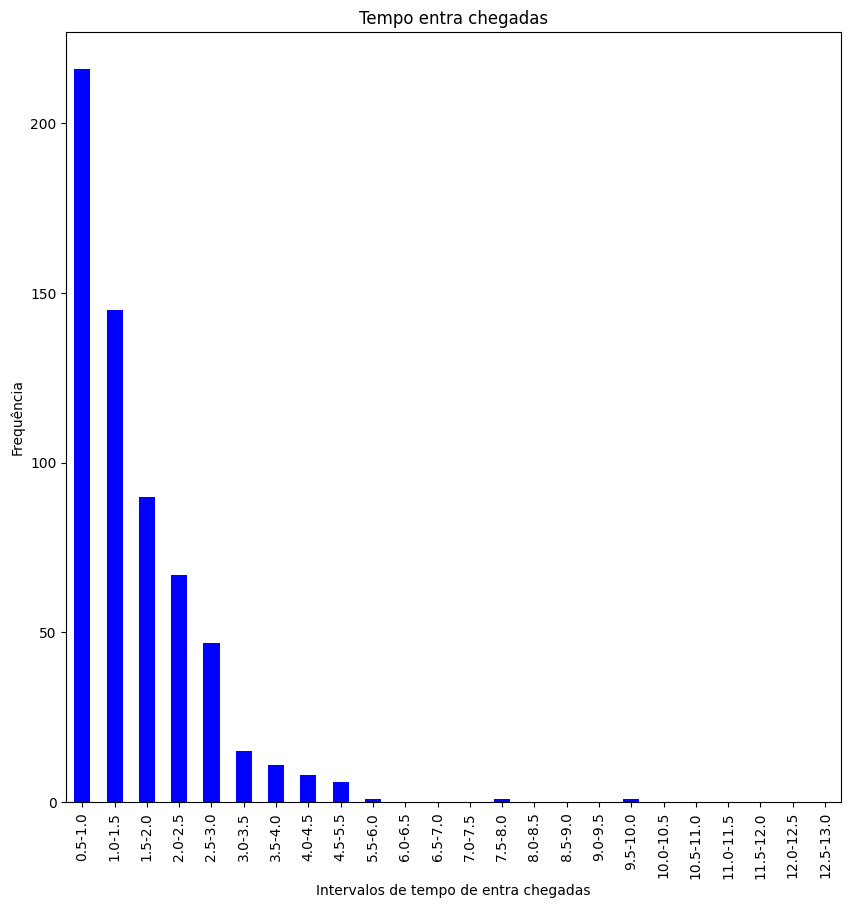

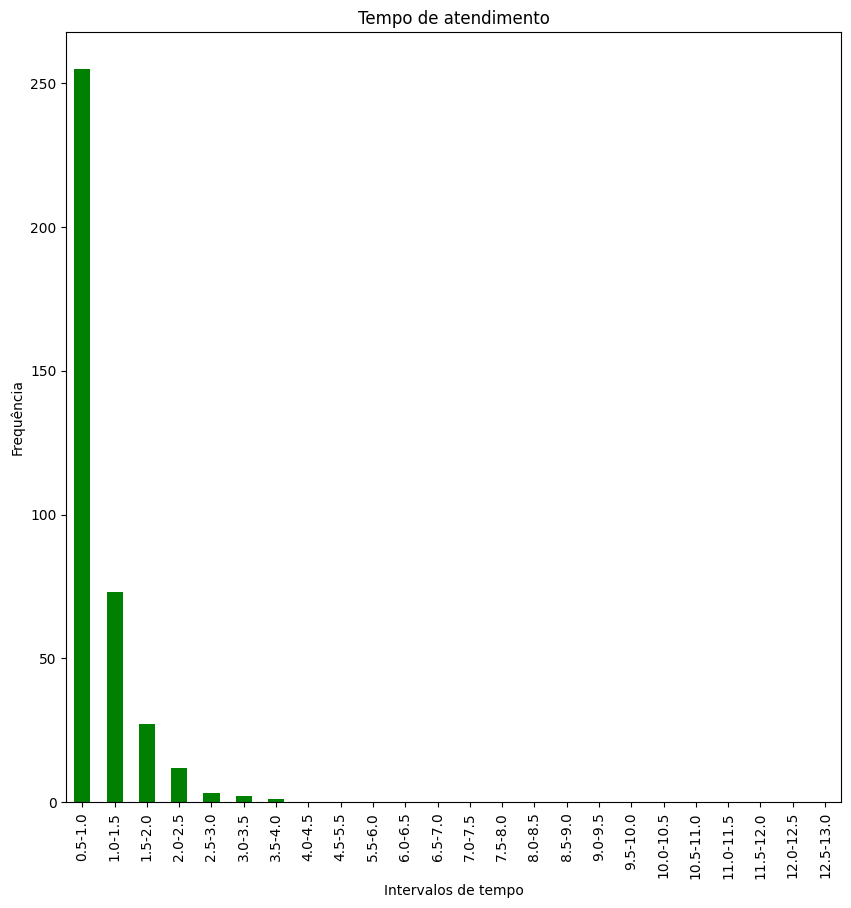

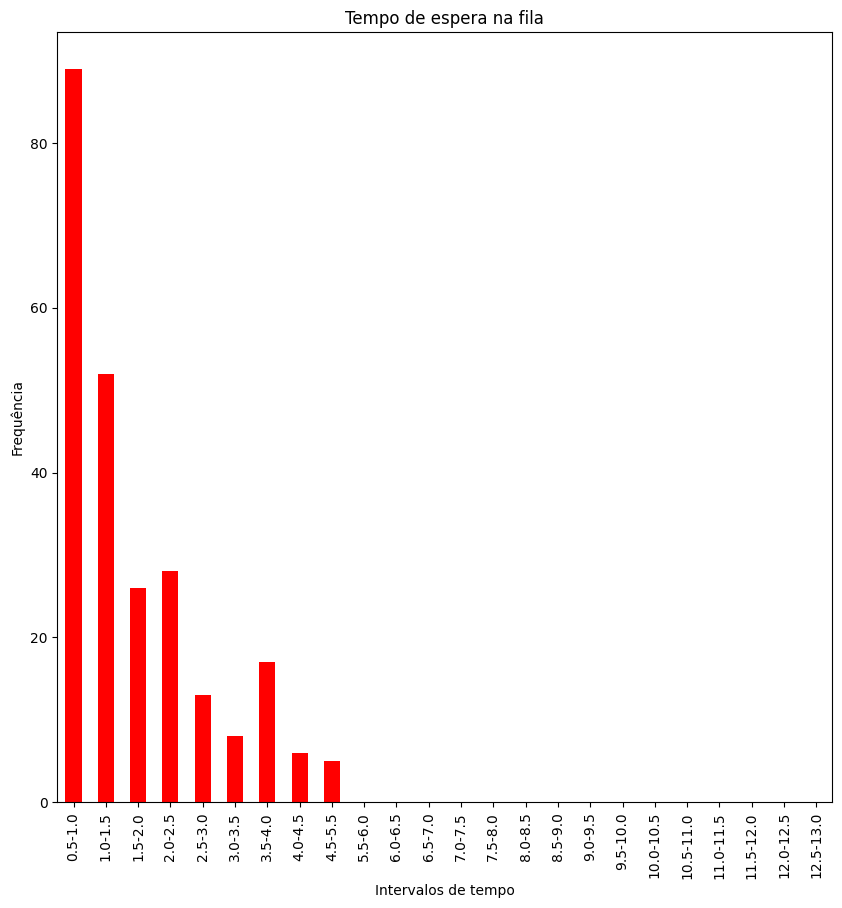

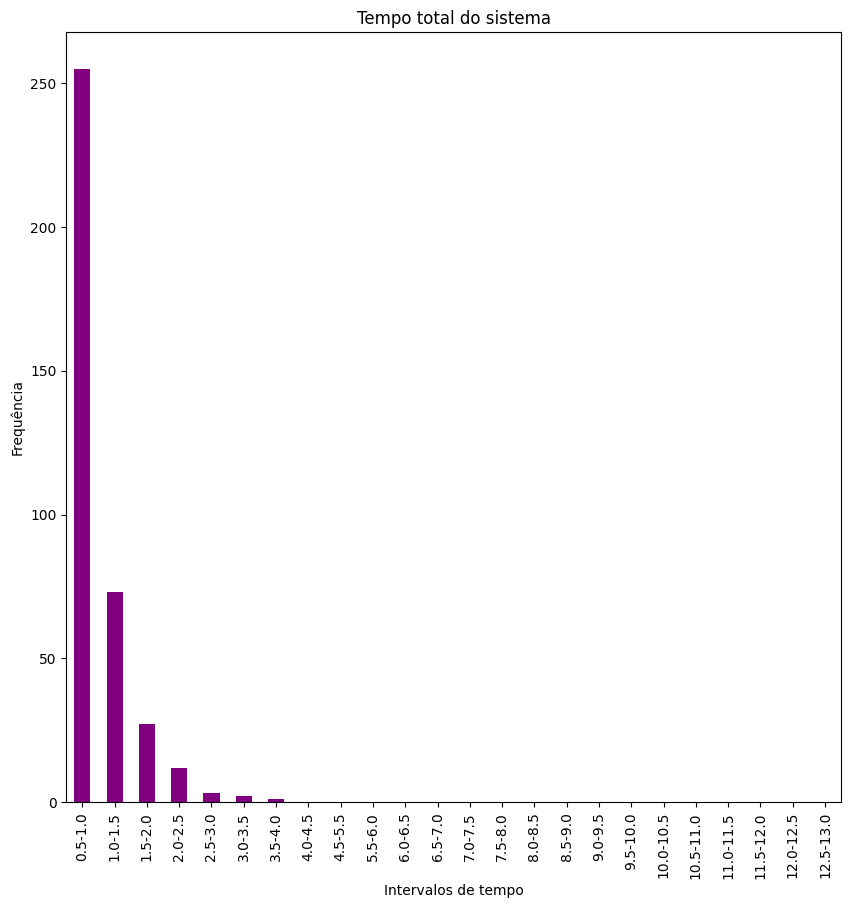

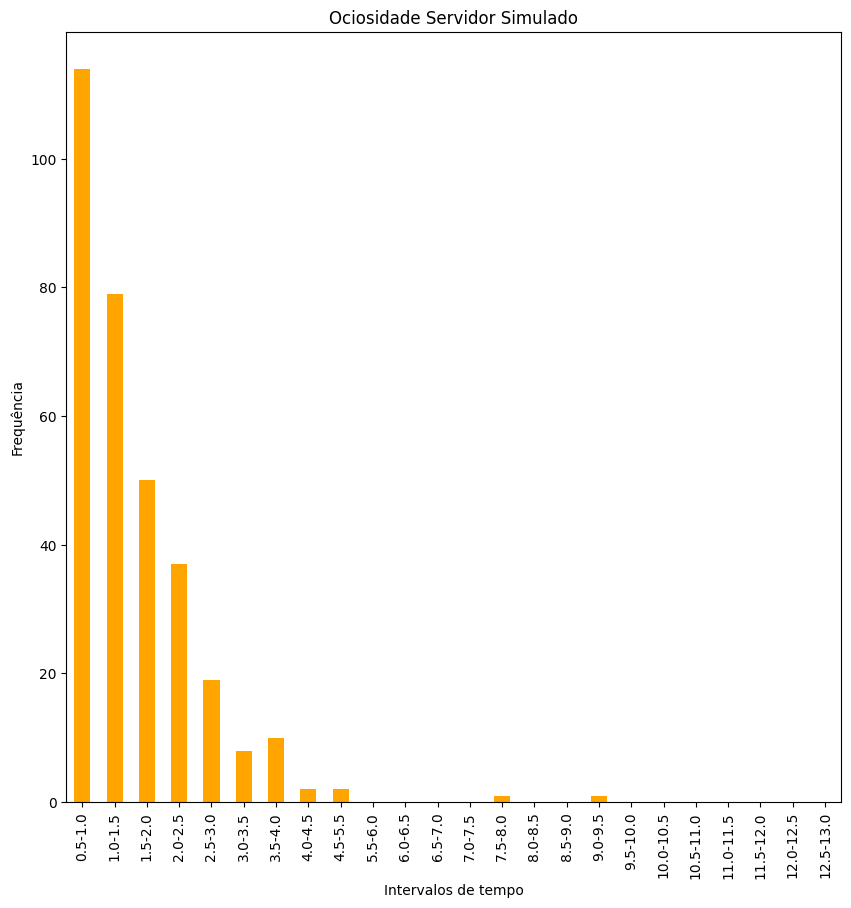

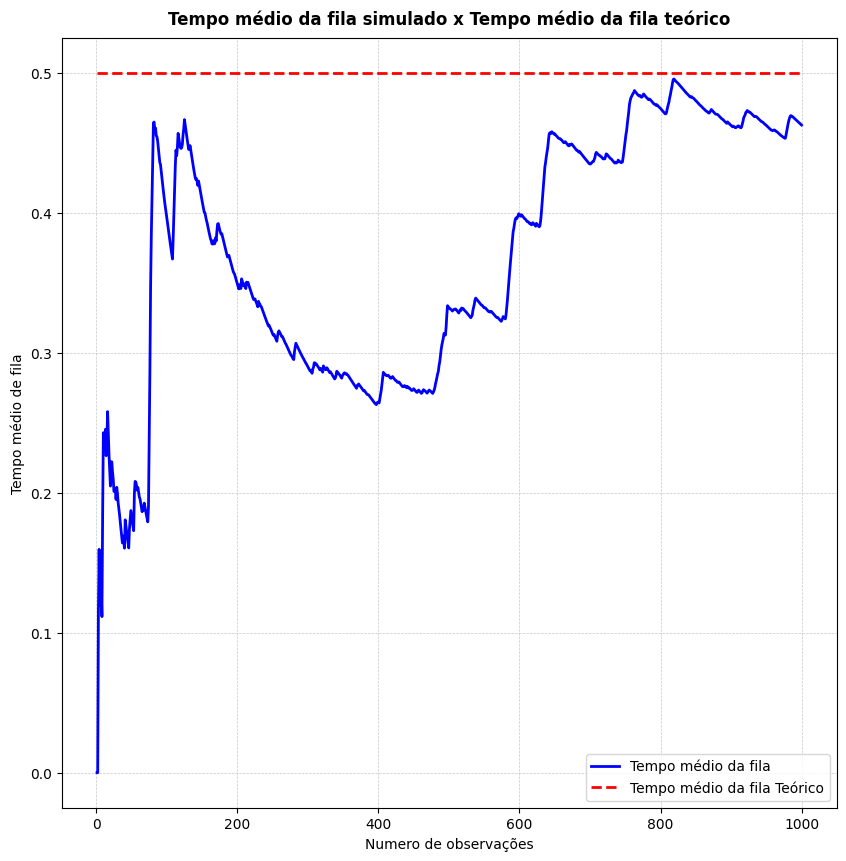

In [12]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_1,wq)

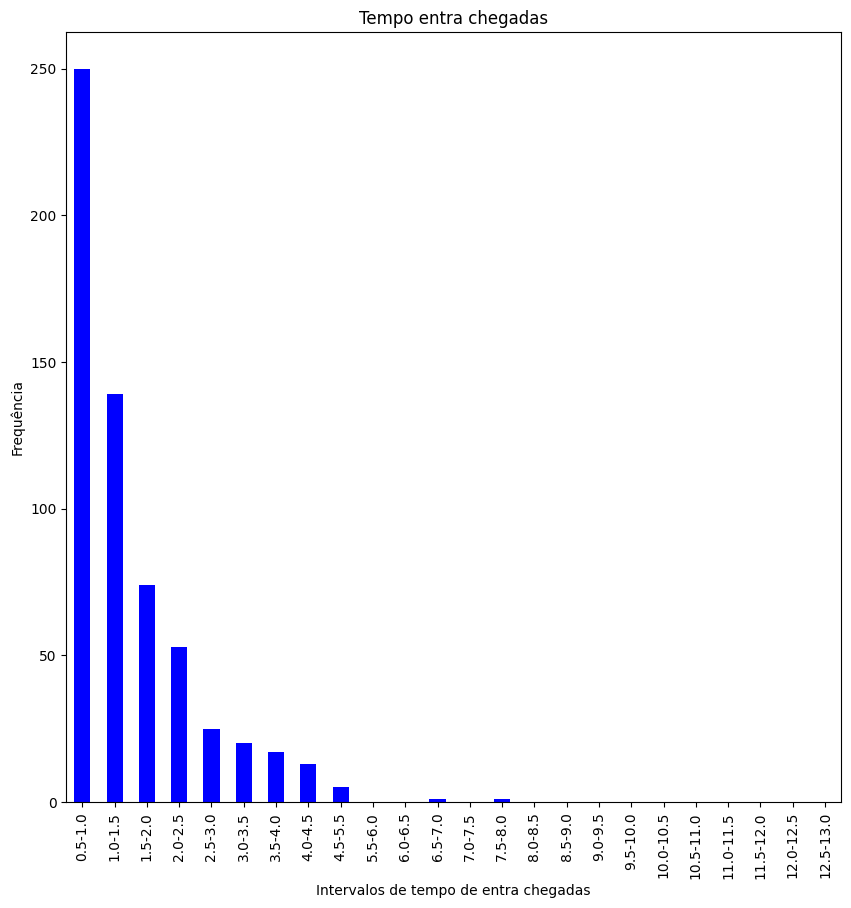

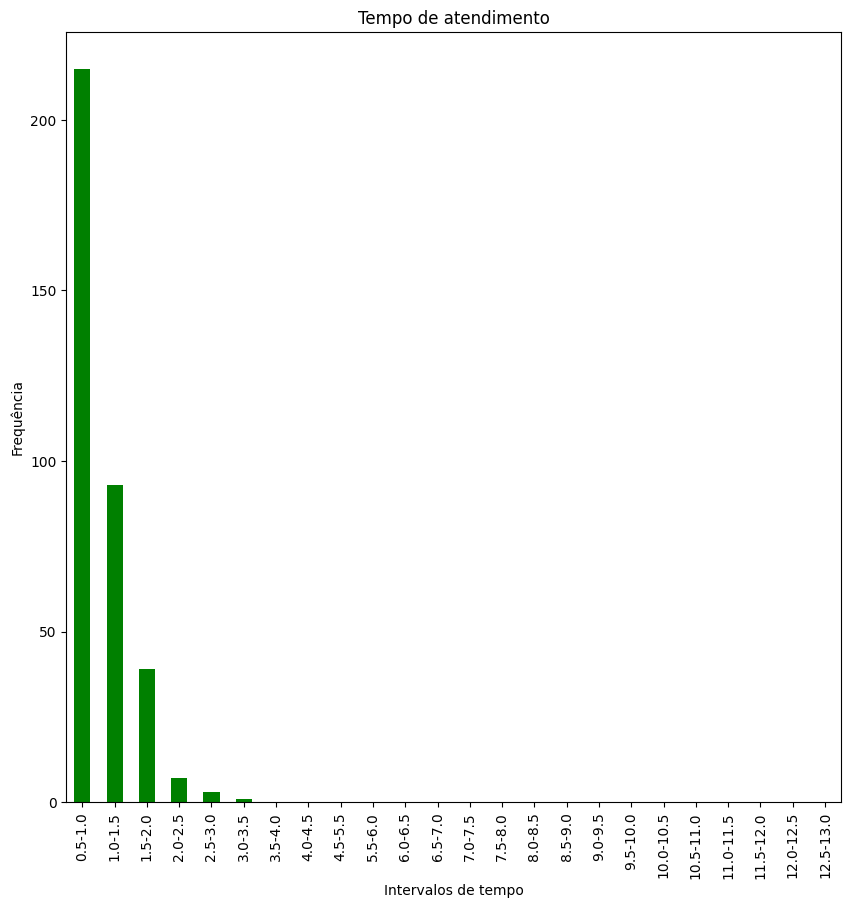

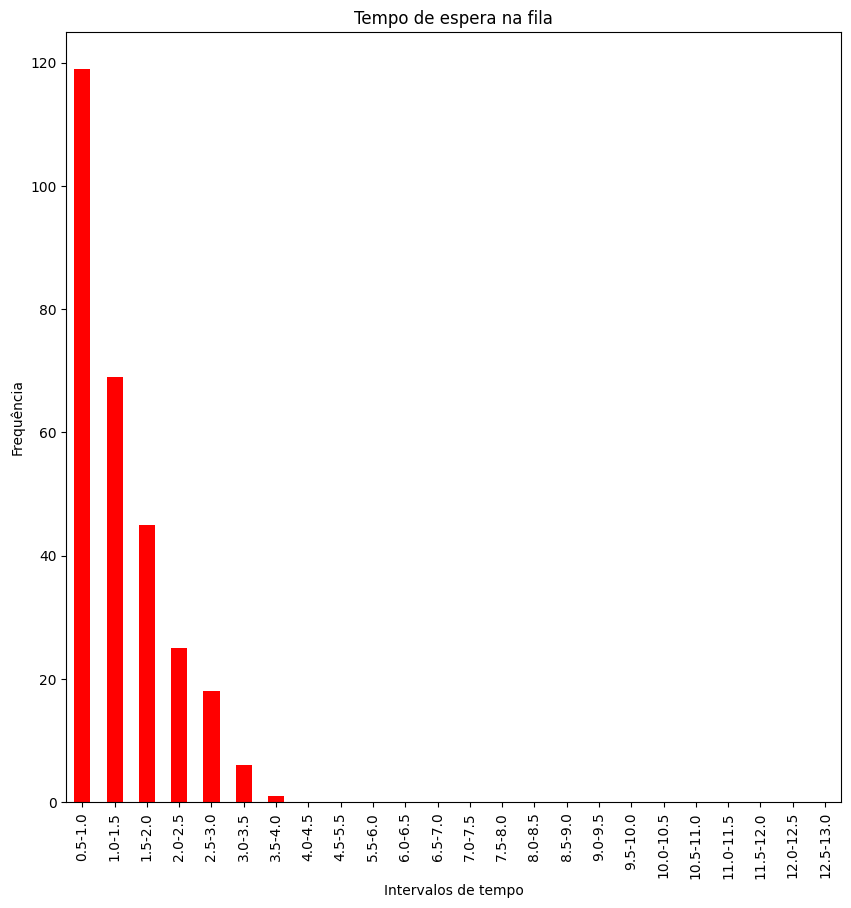

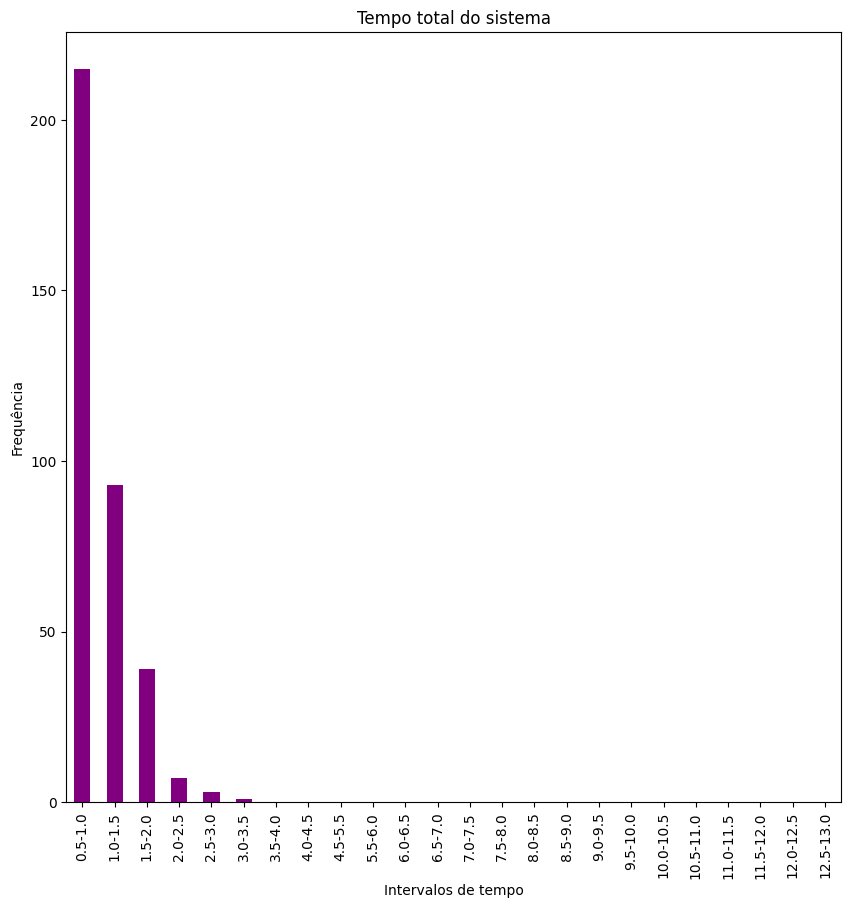

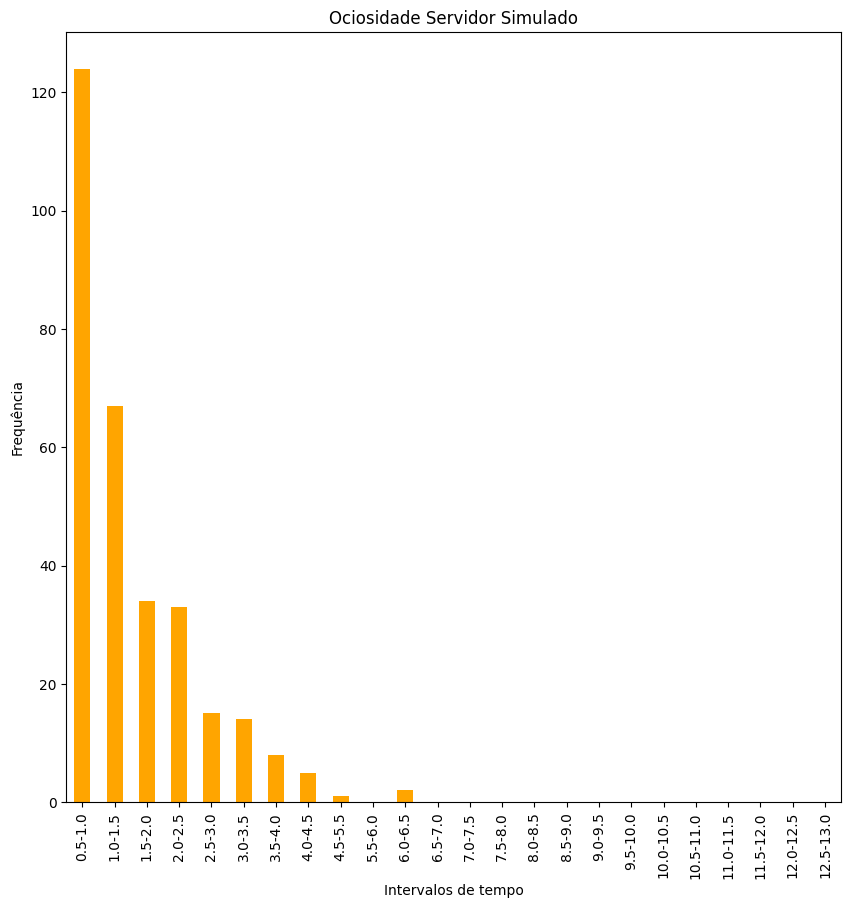

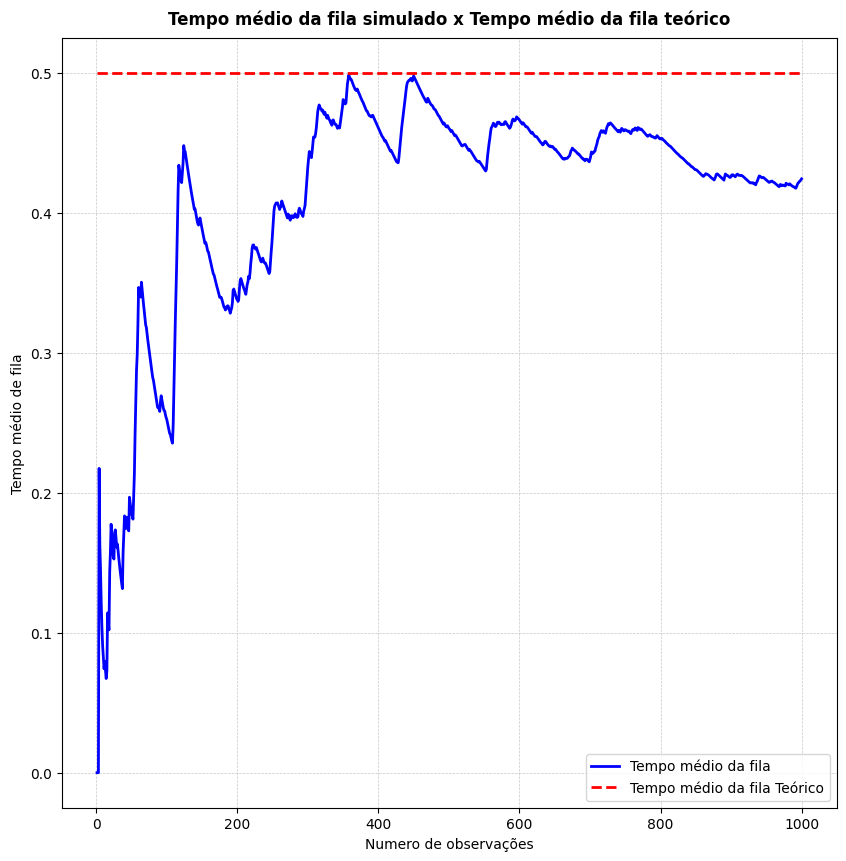

In [13]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_2,wq)

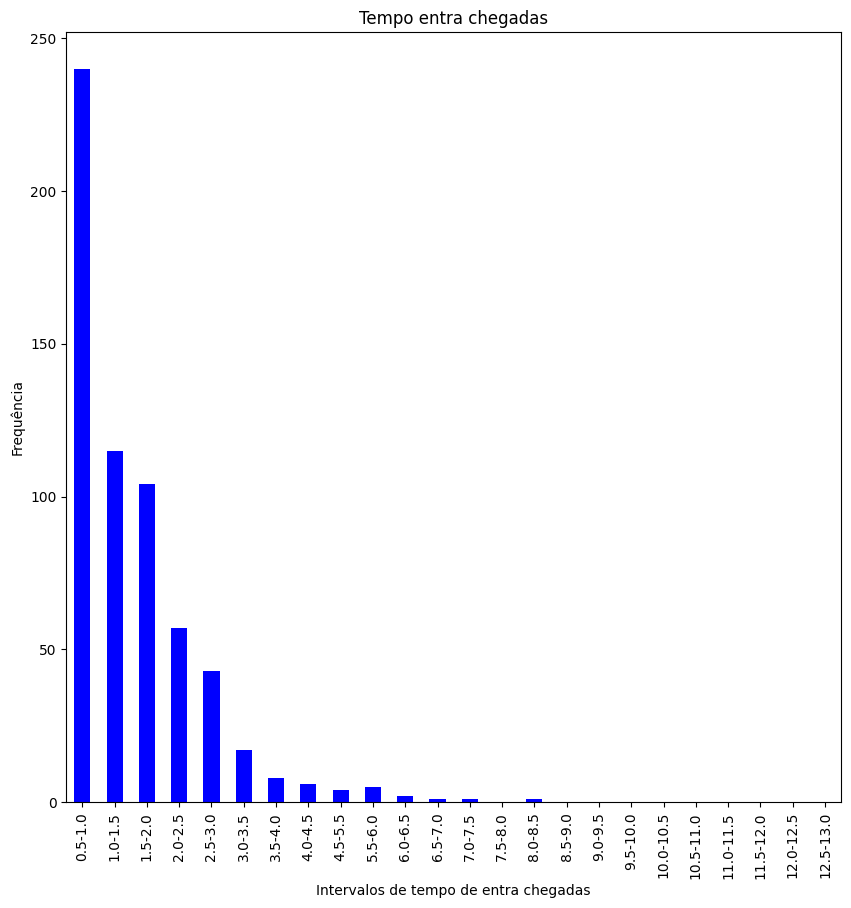

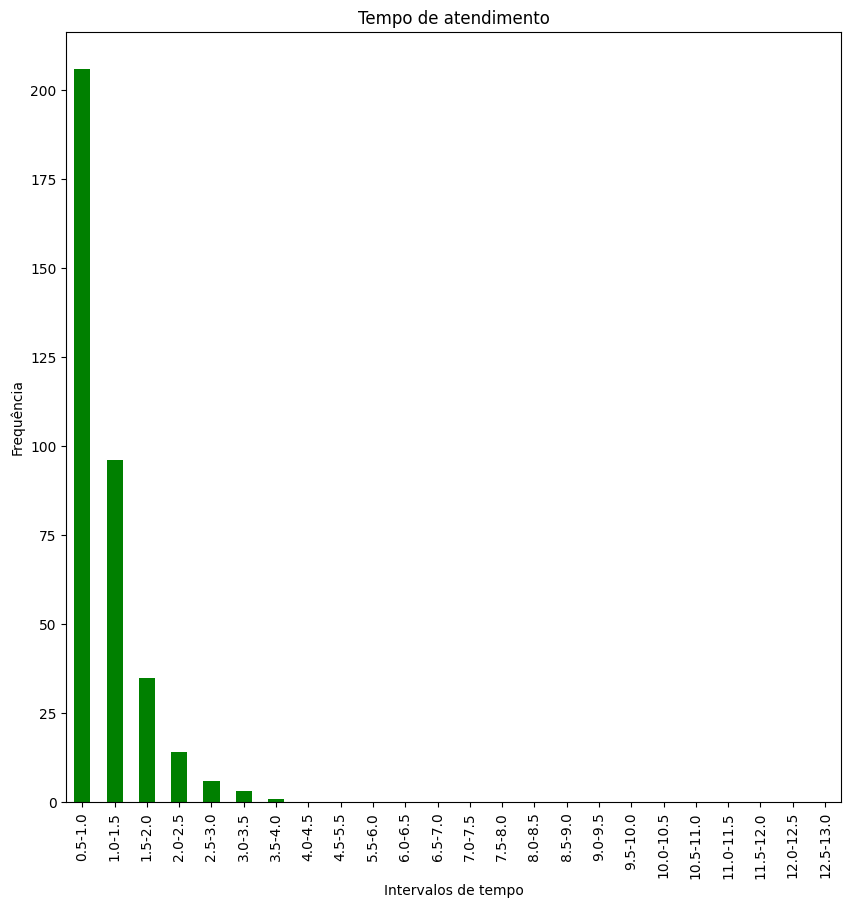

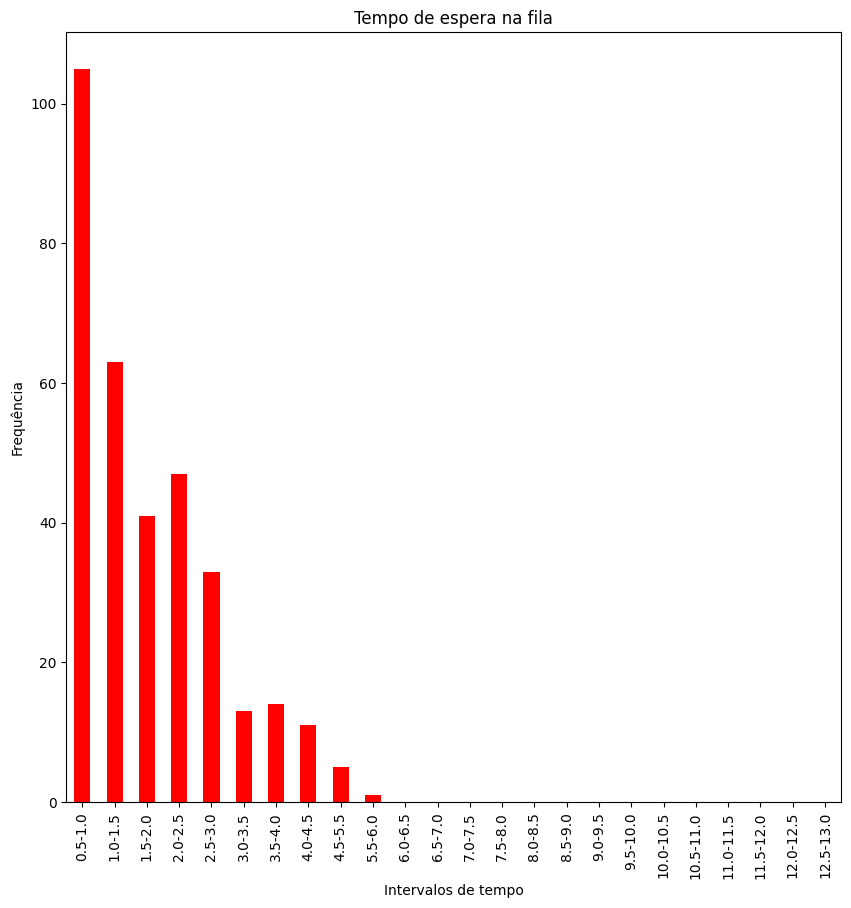

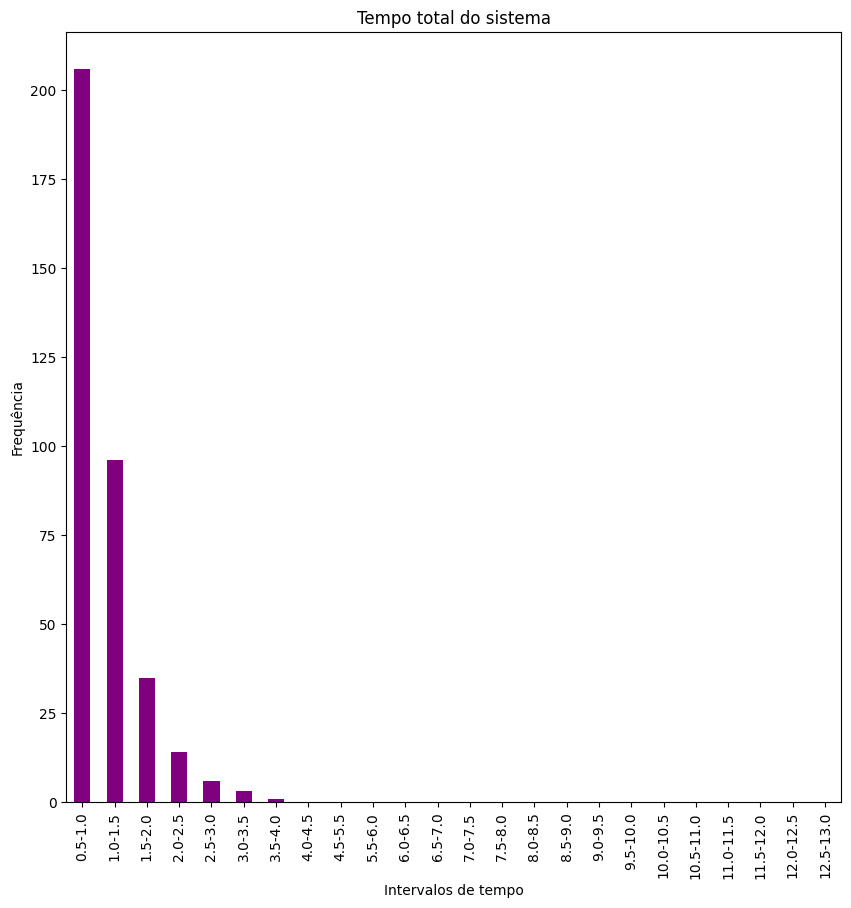

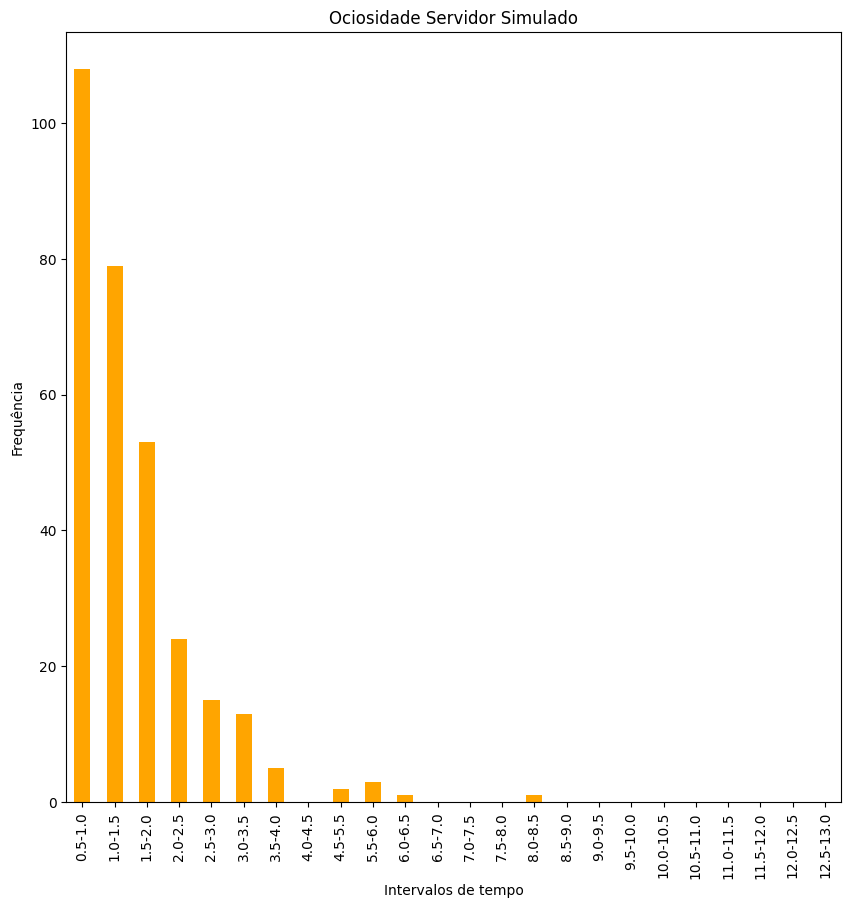

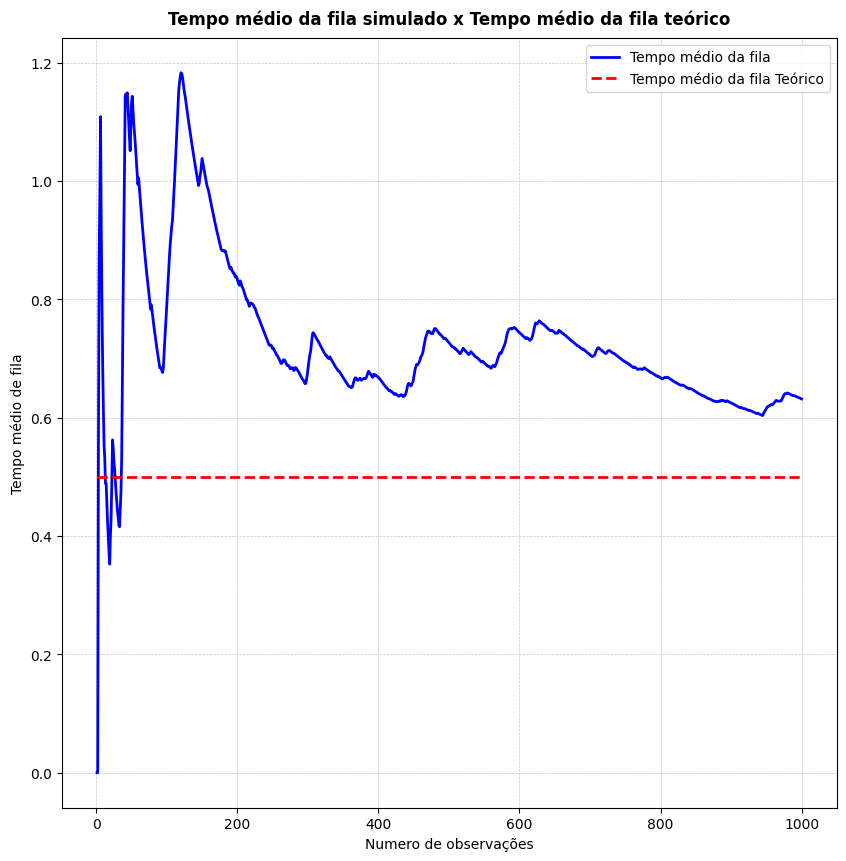

In [14]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_3,wq)


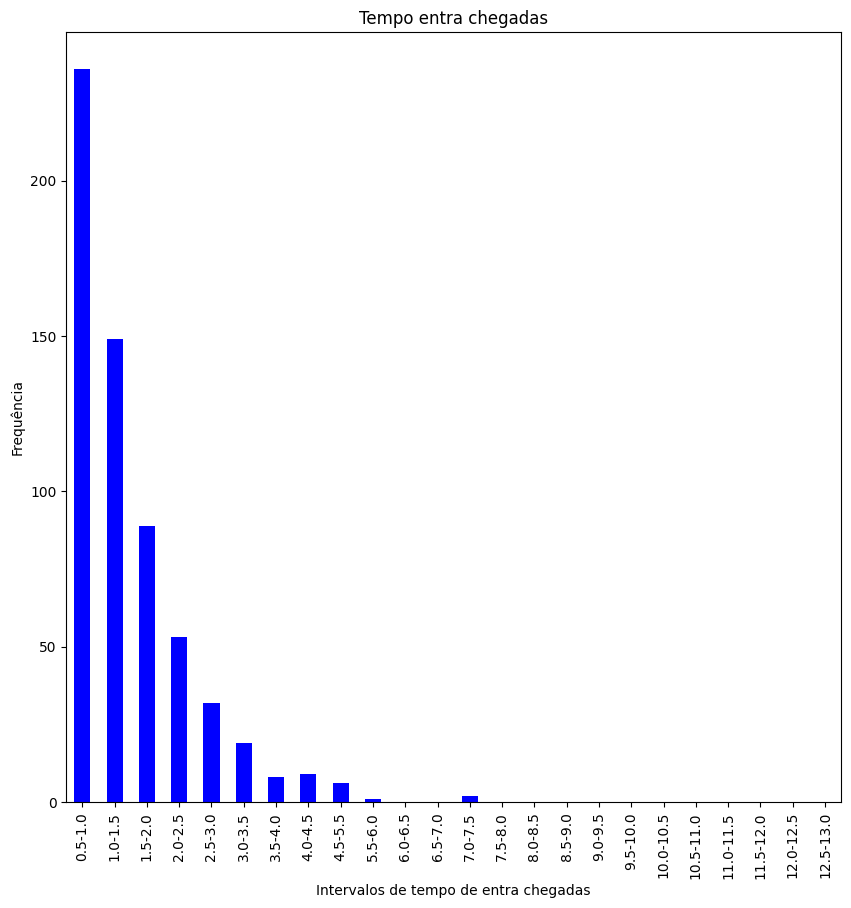

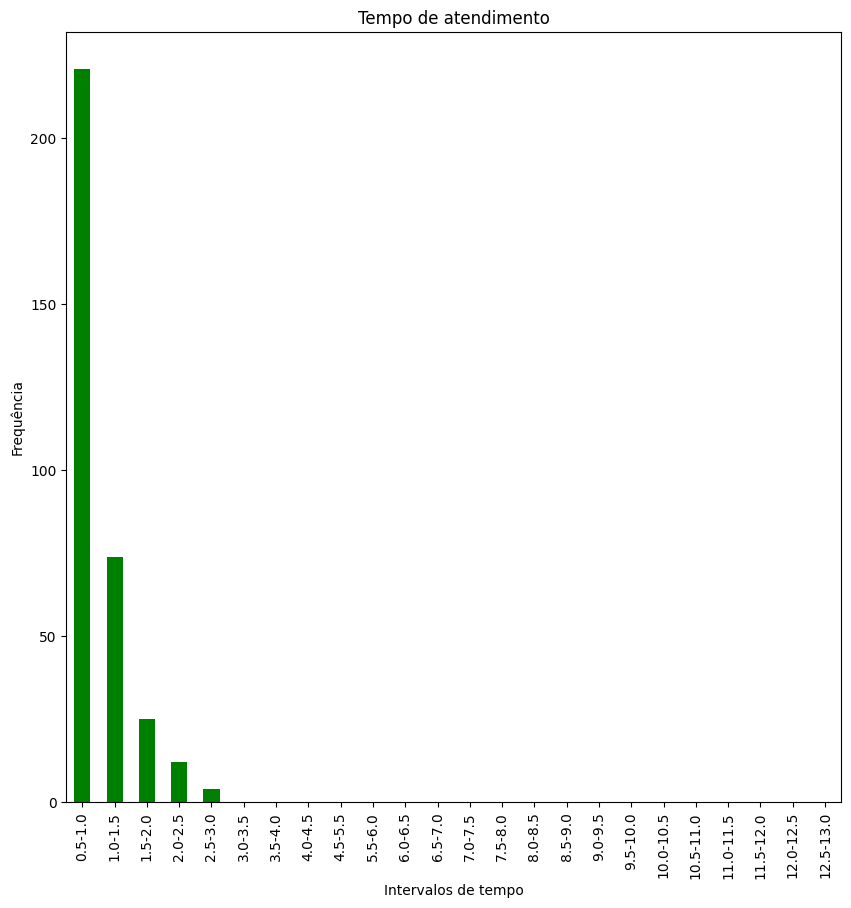

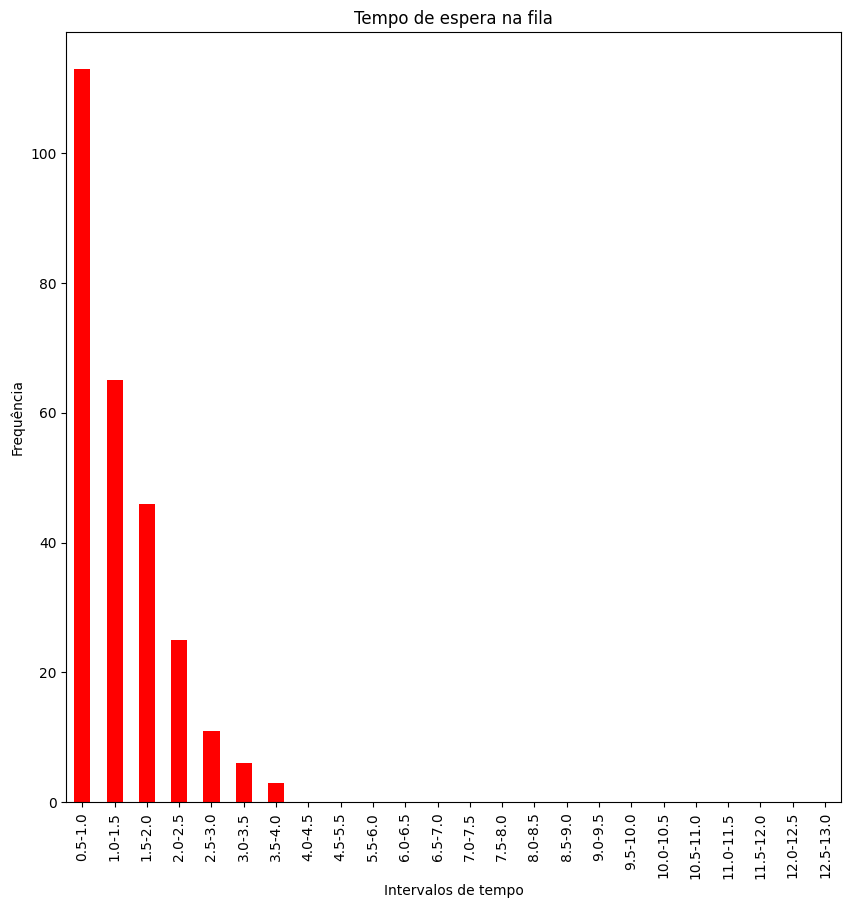

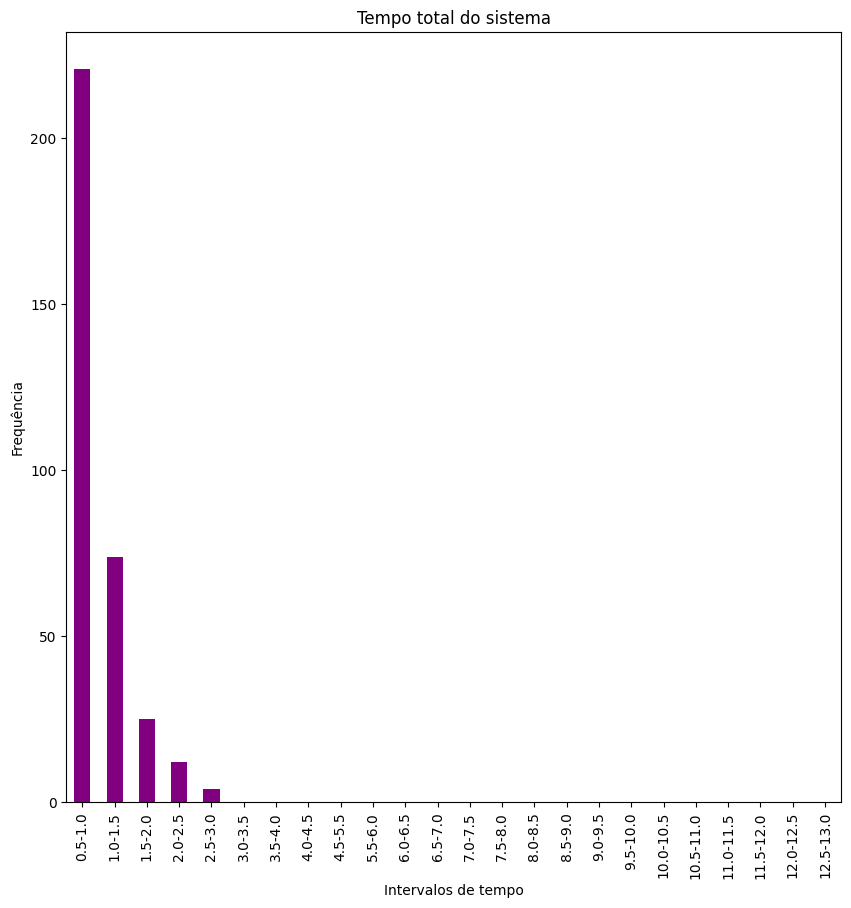

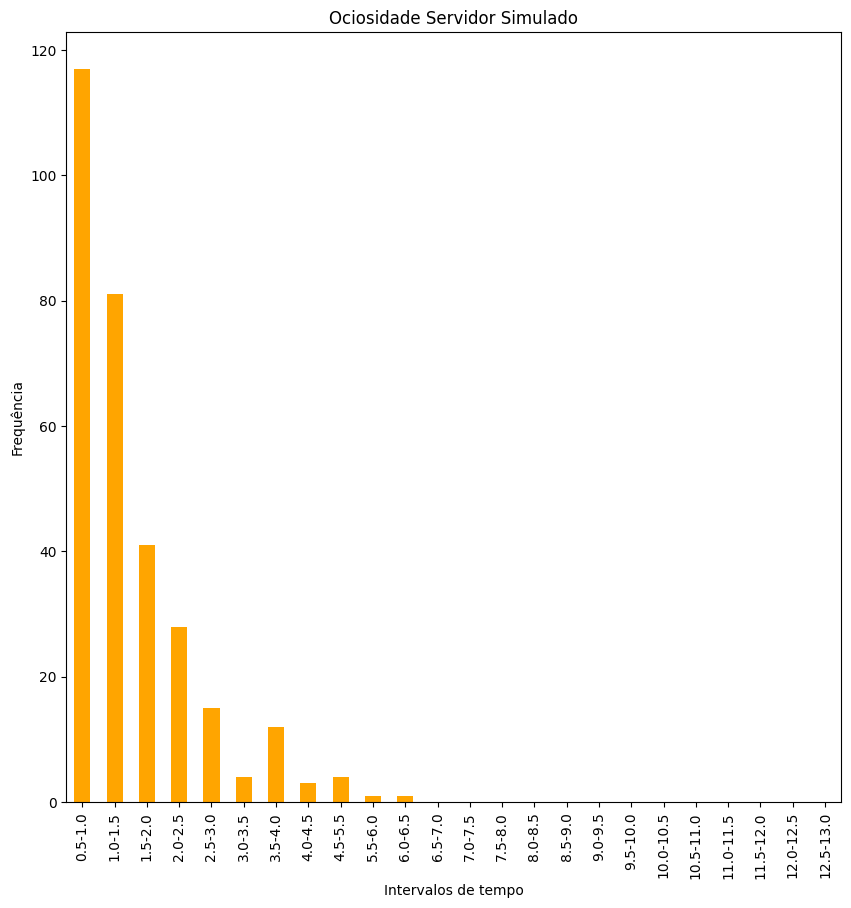

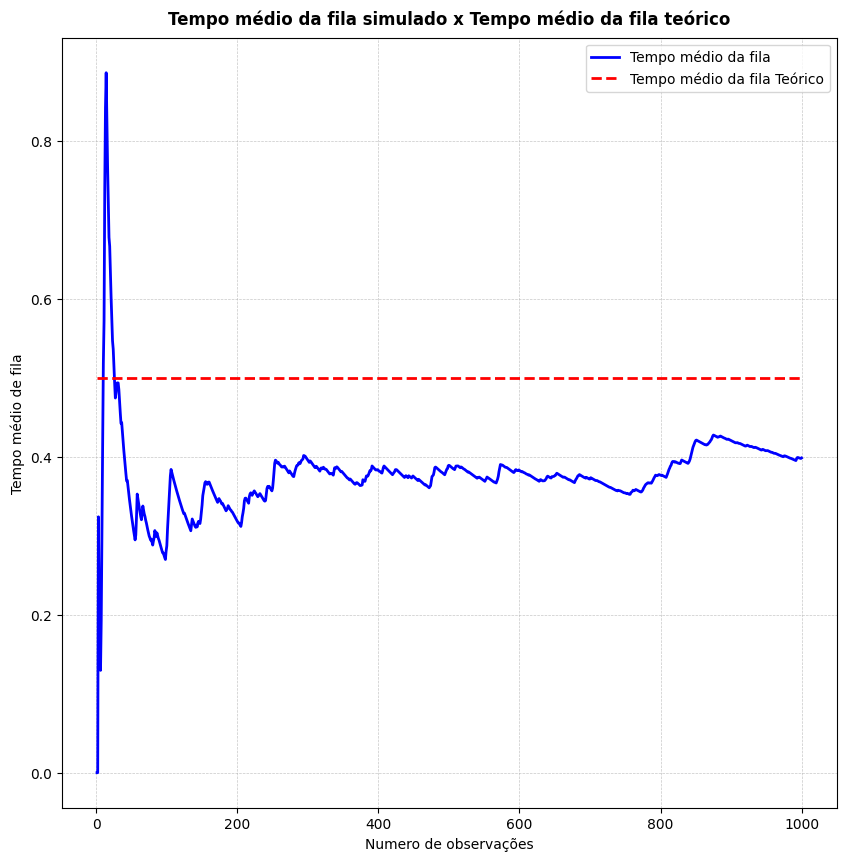

In [15]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_4,wq)


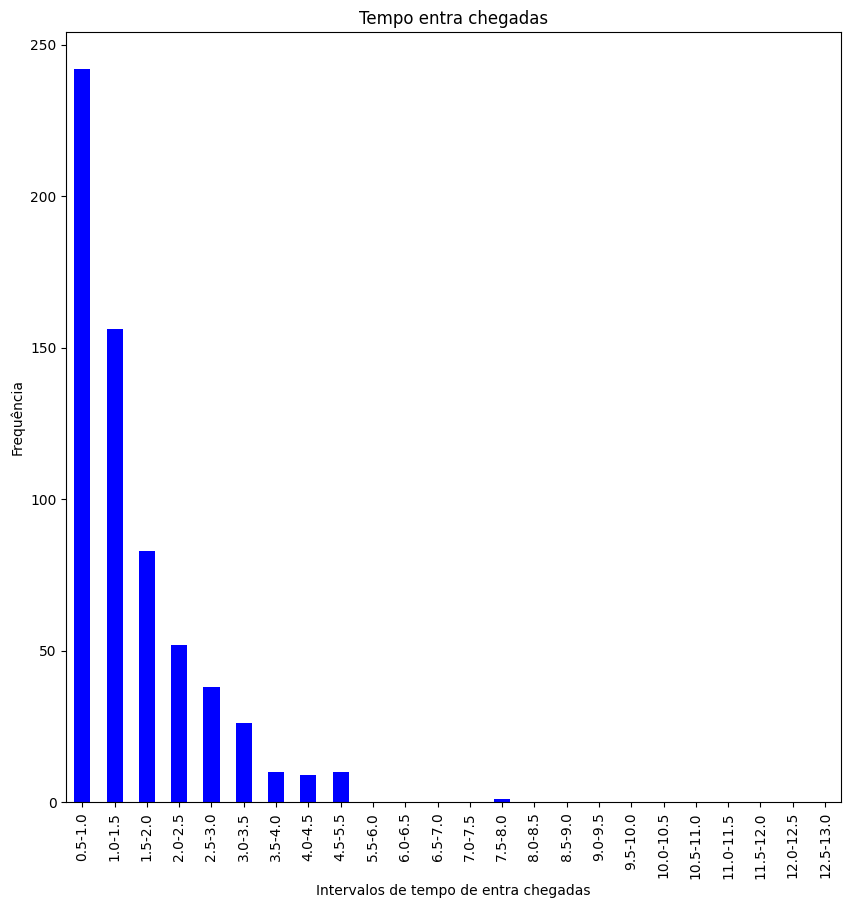

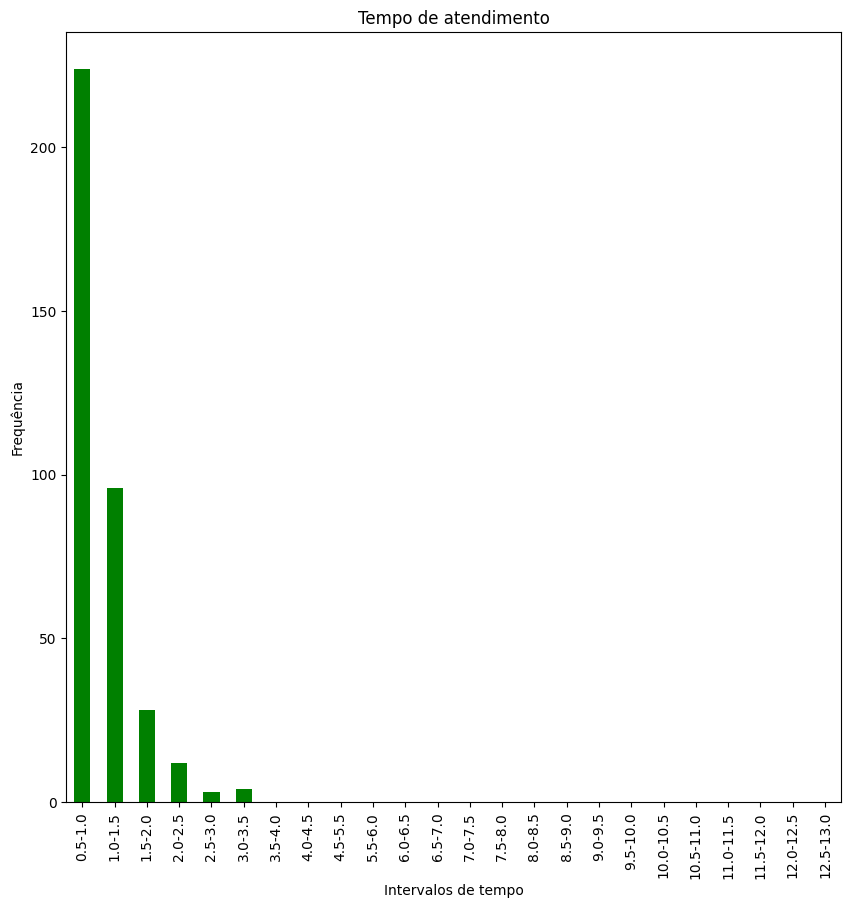

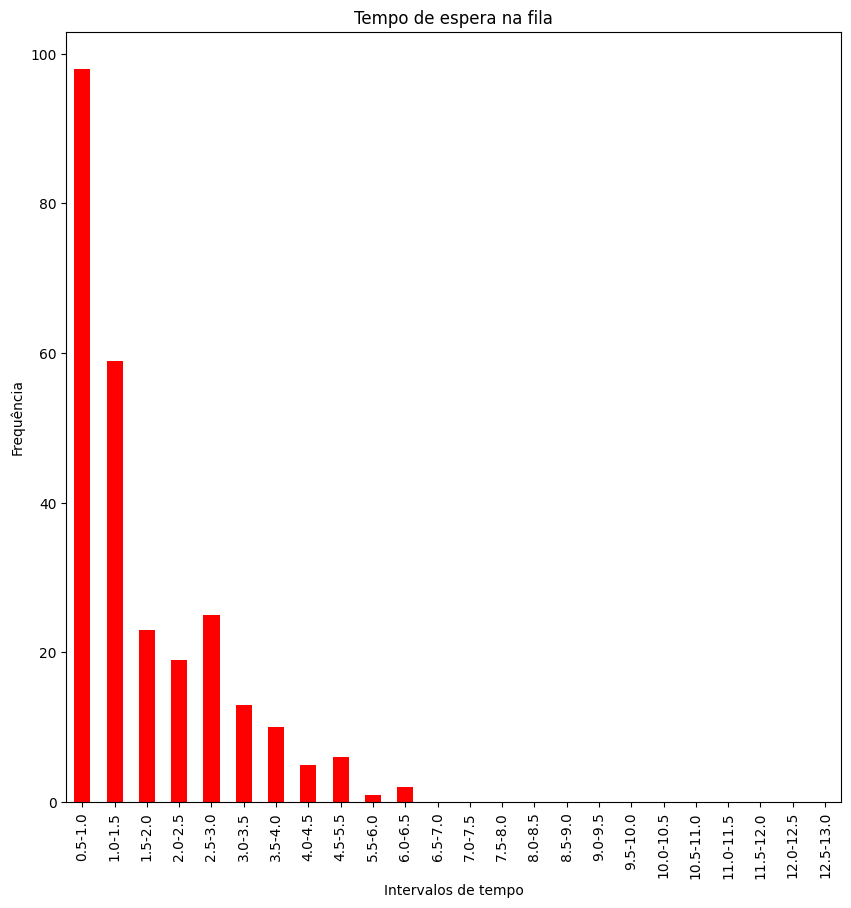

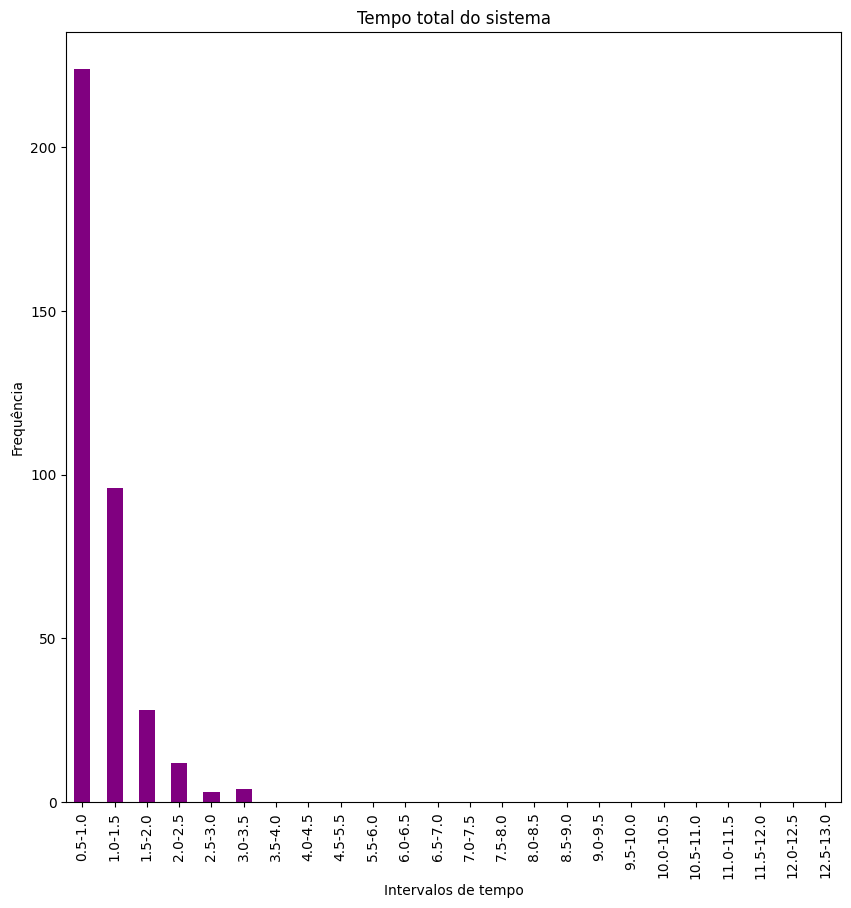

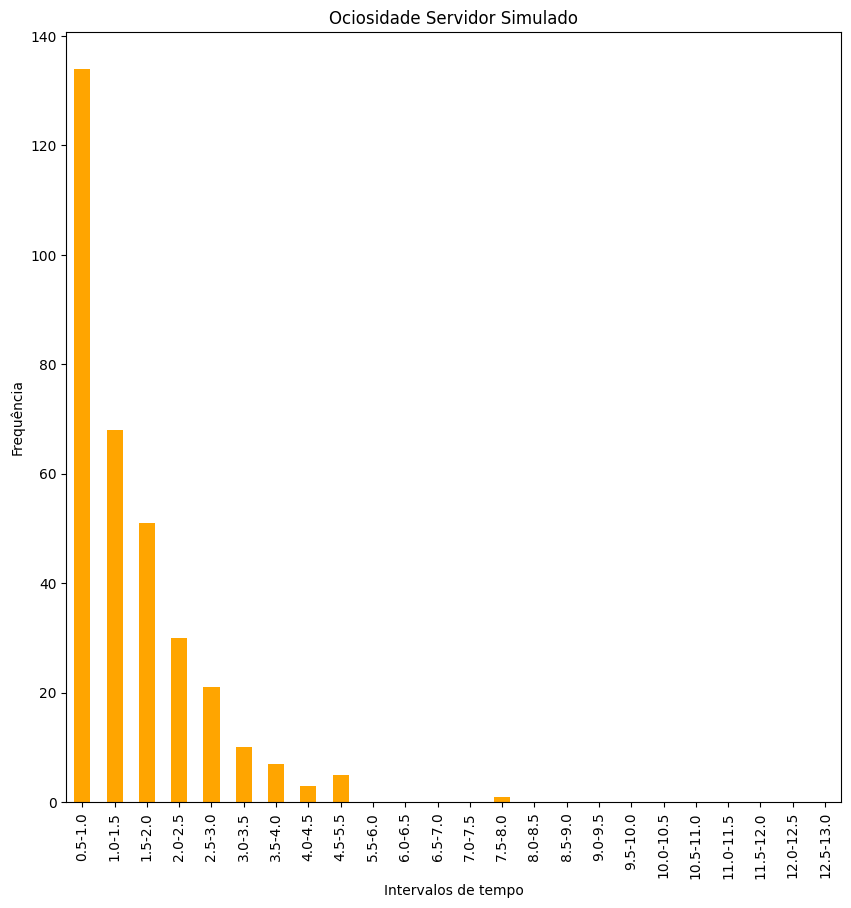

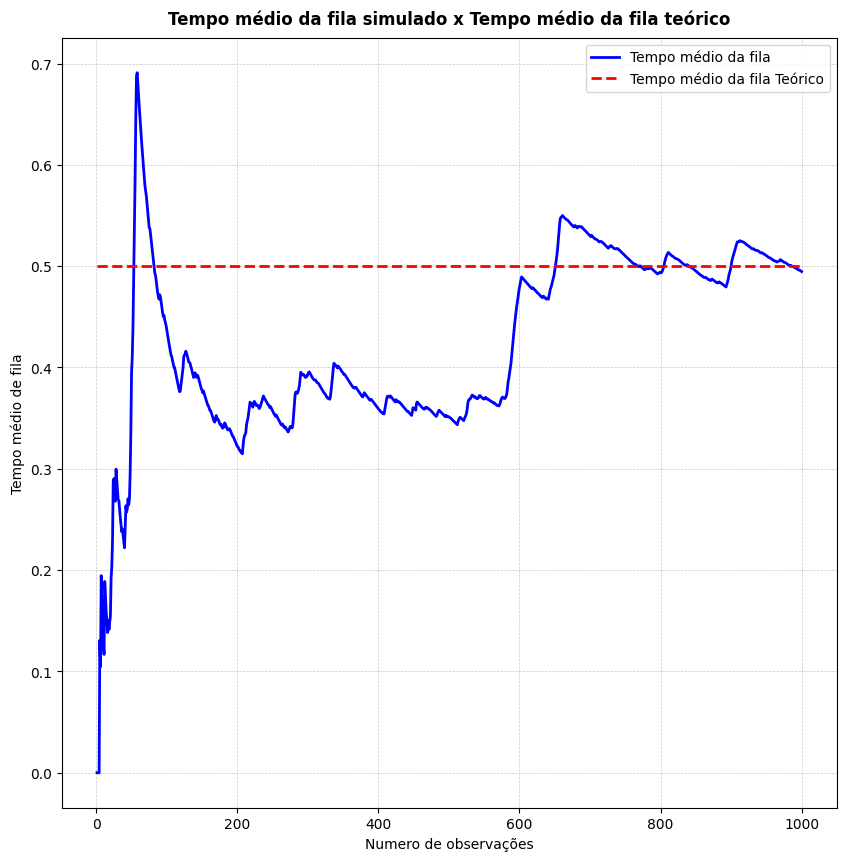

In [16]:
wq = l / (u * (u-l))
generate_frequency_plots(dados_simulacao_5,wq)

In [17]:
tempo_medio_espera_replicações = pd.DataFrame(columns=['Tempo entre chegadas' , 'λ' , 'μ' , 'Simulação 01', 'Simulação 02','Simulação 03' , 'Simulação 04' , 'Simulação 05' , 'w médio' , 'Variância' , 'Wq teórico'])

tempo_ocupacao_replicacoes = pd.Dataframe(columns = ['Tempo entre chegadas', 'λ','μ', 'Simulação 01' , 'Simulação 03', 'Simulação 04' , 'Simulação 05' , 'p médio','Varianância' , 'p teórico'])


In [18]:

m_1 = dados_simulacao_1['Tempo de espera na fila'].mean()
m_2 = dados_simulacao_2['Tempo de espera na fila'].mean()
m_3 = dados_simulacao_3['Tempo de espera na fila'].mean()
m_4 = dados_simulacao_4['Tempo de espera na fila'].mean()
m_5 = dados_simulacao_5['Tempo de espera na fila'].mean()




media_tempo  =  (m_1 + m_2 + m_3 + m_4 + m_5) / 5


wq = l / (u * (u-l))

media = (media_tempo+wq)/2

variancia = (wq-media)**2 + (media_tempo-media)**2



tempo_medio_espera_replicações.loc[0]=[1,l,u,m_1,m_2,m_3,m_4,m_5,media_tempo,variancia , wq]





In [20]:
j = 1



dados_simulacao_aux = []

for i in range (0,5):
    
  dados_simulacao_aux.append(pd.DataFrame(columns=dados_simulacao_1.columns))


for i in range (0,7):
    
    j = j -0.1
    l = 1 / j;
    
    m = []



    
    for k in range (0,5):
      
      generate_simulation(dados_simulacao_aux[k])
      
      m.append(dados_simulacao_aux[k]['Tempo de espera na fila'].mean())

    media_tempo = sum(m)/5
    
    
    wq = l / (u * (u-l))

    media = (media_tempo+wq)/2

    variancia = (wq-media)**2 + (media_tempo-media)**2
    
    
    
    
    
    
    tempo_medio_espera_replicações.loc[i+1 , ['Tempo entre chegadas' , 'λ' , 'μ' ,'Simulação 01', 'Simulação 02' , 'Simulação 03', 'Simulação 04', 'Simulação 05', 'w médio' , 'Variância' , 'Wq teórico']]=[1,l,u,m[0],m[1],m[2],m[3],m[4], media_tempo,variancia , wq]


tempo_medio_espera_replicações
  
    
    
    
    

,Tempo entre chegadas,λ,μ,Simulação 01,Simulação 02,Simulação 03,Simulação 04,Simulação 05,w médio,Variância,Wq teórico
0,1.0,1.000000,2.0,0.462185,0.423741,0.631028,0.398124,0.494170,0.481850,1.647170e-04,5.000000e-01
1,1.0,1.111111,2.0,0.765905,0.534347,0.770551,0.519916,0.558719,0.629888,1.194473e-05,6.250000e-01
2,1.0,1.250000,2.0,0.826331,0.519650,0.461652,0.729713,0.677169,0.642903,1.813186e-02,8.333333e-01
3,1.0,1.428571,2.0,1.103433,0.971320,1.338167,1.480465,1.622176,1.303112,1.410463e-03,1.250000e+00
4,1.0,1.666667,2.0,3.575129,1.754626,2.735638,2.822912,1.866518,2.550965,1.298706e-03,2.500000e+00
5,1.0,2.000000,2.0,10.694353,6.850253,20.781542,9.899310,8.689738,11.383039,2.535301e+30,2.251800e+15
6,1.0,2.500000,2.0,41.744354,50.457046,63.821267,47.222752,55.100541,51.669192,1.467151e+03,-2.500000e+00
7,1.0,3.333333,2.0,104.344297,101.447771,101.087994,90.413825,98.700586,99.198894,5.044990e+03,-1.250000e+00
